# Assignment 6
#### VADHRI VENKATA RATNAM
#### 17.06.2023

In [1]:
from qiskit import *
from qiskit.quantum_info import *
from qiskit.extensions import *
from random import randrange
import numpy
from qiskit.circuit.library import CPhaseGate
import pennylane as qml
import numpy as np

from qiskit.extensions import HamiltonianGate
from qiskit.quantum_info import Statevector

np.set_printoptions(precision=3)

import math


## 1. Fixed point Binary notation of decimal numbers. 

|Number|Fixed point binary|
|-|-|
|53|0 110101|
|26.5|0 11010.1|
|-43.625|1 101011.101|
|0.6875|0 0.1011|
|55.66|0 110111.101010001111010111|

## 2. no of qubits required for basis encoding

|F1|F2|F3|F4|F5|F6|F7|F8|F9|F10|F11|F12|F13|F14|F15|F16|F17|F18|F19|F20|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|
|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|
|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|
|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|
|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|
|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|
|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|
|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|
|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|
|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|
|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|
|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|
|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|
|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|
|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|
|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|
|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|
|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|
|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|
|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|6|


1200 (6 * 10 * 20) qubits for 10 features, 20 data points 6 bits each ( assumig that 6 bits contain the full representation.)

## 3. Superposition can improve the number of qubits required. 

One training iteration data would be loaded at one shot which is one row of the table in problem #2. 

That is 6*20 = 120 qubits. 

Loading and storage two branches - 2*120 = 240. Two aniclla bits, 242 Qubits.

## 4. Produce |0101> + |1110> using basis encoding technique. 

#### Method 1 : Initialize

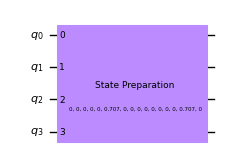

In [2]:
from qiskit import *
from qiskit.quantum_info import Statevector
import math
import random

data = [0,0,0,0,0, 1/math.sqrt(2), 0,0,0,0,0,0,0,0, 1/math.sqrt(2), 0]
total = math.sqrt(sum([i*i for i in data]))
normalized_data = [i/total for i in data]

num_qubits = 4
circ = QuantumCircuit(num_qubits)
circ.prepare_state(normalized_data, [0, 1, 2, 3])
circ.draw(output="mpl", scale=0.5)

In [3]:
state = Statevector(circ)
state.draw(output="Latex")

<IPython.core.display.Latex object>

#### Method 2 : Superposition

A. If the number of bits of training data is 6 bits of a feature, then Processing branch + Storage branch + Ancilla Qubits = 6 + 6 + 2 = 14

B. Split the branches by using H gate on A2. 

C. Load the training vector ( all features of one training vector ) into the processing branch. 

D. Move the data to storage branch. 

E. Split the processing branch with Unitary gate which calculates $ U(\mu) = \begin{bmatrix} \sqrt\frac{\mu-1}{\mu} &\frac{1}{\sqrt\mu} \\ \frac{-1}{\sqrt\mu}& \sqrt\frac{\mu-1}{\mu} \end{bmatrix}$

F. Flip A1 for branch where loading register == storage register. 

G. Reset the storage register and loading register of both both branches.

H. Repeat from C, until all vectors are loaded.

In [4]:
## Load the first training vector
from qiskit.circuit.library import MCXGate
from qiskit import *
from qiskit.quantum_info import *
from qiskit.extensions import *
from random import randrange
import numpy
from qiskit.circuit.library import CPhaseGate

L = QuantumRegister(4, name="L")
A = QuantumRegister(2, name="A")
S = QuantumRegister(4, name="S")

C = ClassicalRegister(4)
QC = QuantumCircuit(S,A,L,C)

QC.barrier()

# data = [format(randrange(1,100), "#010b")[6:] for _ in range(2)]
data = ['0101', '1110']
QC.h(A[0])
m = 1
M = 2**len(data[0])

for d in data:
    print (d[::-1])
    QC.barrier()
    for i, v in enumerate(d):
        if v == '1':
            QC.x(L[i])

    for i in range(4):
        if d[i] == '1':
            QC.ccx(A[0], L[i], S[i])
    QC.barrier()

    QC.cx(A[0], A[1])
    Mu = M + 1 - m
    UMu = UnitaryGate([[math.sqrt((Mu-1)/(Mu)),1/math.sqrt(Mu)],[-1/math.sqrt(Mu),math.sqrt((Mu-1)/(Mu))]], label="UMu").control()
    QC.append(UMu, [A[1], A[0]])
    QC.barrier()

    gate = MCXGate(8)

    # ## reset the first training vector
    for i, v in enumerate(d):
        if v == '0':
            QC.x(L[i])
            QC.x(S[i])

    QC.barrier()
    QC.append(gate, [0,1,2,3,6,7,8,9,5])
    QC.barrier()

    # ## reset the first training vector
    for i, v in enumerate(d):
        if v == '0':
            QC.x(L[i])
            QC.x(S[i])

    for i, v in enumerate(d):
        if v == '1':
            QC.x(L[i])


    for i, v in enumerate(d):
        if v == '1':
            QC.cx(A[0], S[i])
    m += 1
state = Statevector(QC)
state.draw(output="Latex")

1010
0111


<IPython.core.display.Latex object>

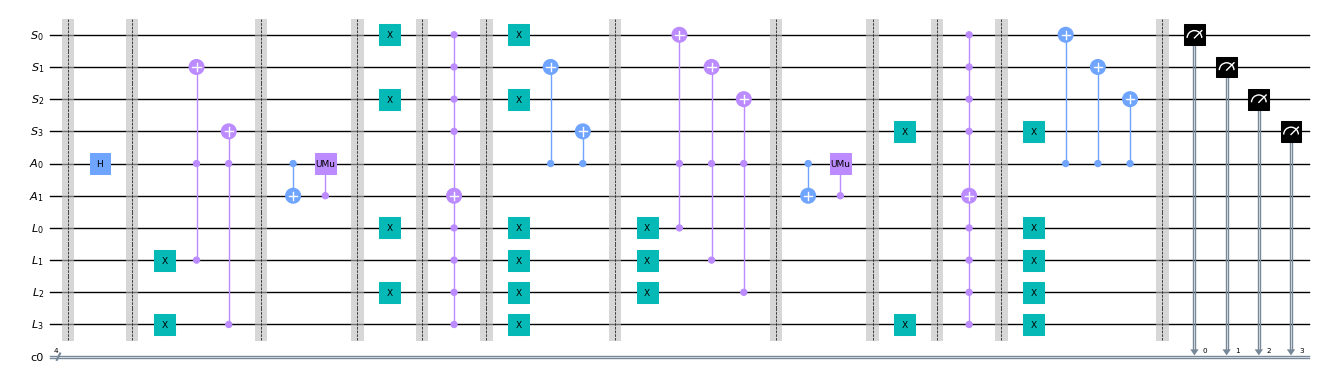

In [5]:
QC.barrier()
for i in range(4):
    QC.measure(S[i], C[i])

QC.draw(output="mpl", scale=0.5, fold=1000)

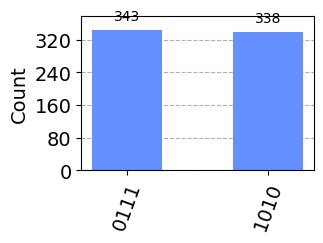

In [6]:
backend = Aer.get_backend("aer_simulator")

result = execute(QC, backend=backend, shots=10000).result()

from IPython.display import Latex
from qiskit.visualization import *

state_to_latex = result.get_counts()

# removing for better visualization
del state_to_latex['0000']

plot_histogram(state_to_latex, figsize=(3,2))

## 5.How many Qubits may be required for the state preperation in amplitude encoding ?  

Total number of data points for all rows of data = 10*20 = 200 

Number of qubits required = math.ceil(math.log(200,2)) = 8 qubits

## 6. Product the state below in amplitude encoding. 

{0.2, 0.5}, {0.2, 0.1}

The following is an example of mottgen state preparration circuit with uniform rotation. 
 

### 3 Qubit implementation

#### Qiskit

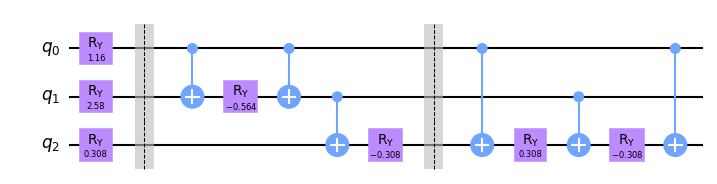

In [7]:
QC = QuantumCircuit(3)
QC.ry(1.15928, 0)
QC.ry(2.57765, 1)
QC.ry(0.30774, 2)
QC.barrier()
QC.cx(0,1)

QC.ry(-0.56394, 1)
QC.cnot(0,1)
QC.cnot(1,2)
QC.ry(-0.30774, 2)
QC.barrier()
QC.cnot(0,2)
QC.ry(0.30774, 2)
QC.cnot(1,2)
QC.ry(-0.30774, 2)
QC.cnot(0,2)

QC.draw(output="mpl", scale=0.75)

In [8]:
S = Statevector(QC)
S.draw(output="Latex")

<IPython.core.display.Latex object>

#### Pennylane

In [9]:
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def circuit(state):
    qml.MottonenStatePreparation(state_vector=state, wires=range(3))
    return qml.state()

state = np.array([0.2, 0, 0.5, 0, 0, 0, 0.2, 0.1])
state = [math.sqrt(i) for i in state]
print (state)

[0.4472135954999579, 0.0, 0.7071067811865476, 0.0, 0.0, 0.0, 0.4472135954999579, 0.31622776601683794]


(<Figure size 1400x400 with 1 Axes>, <Axes: >)


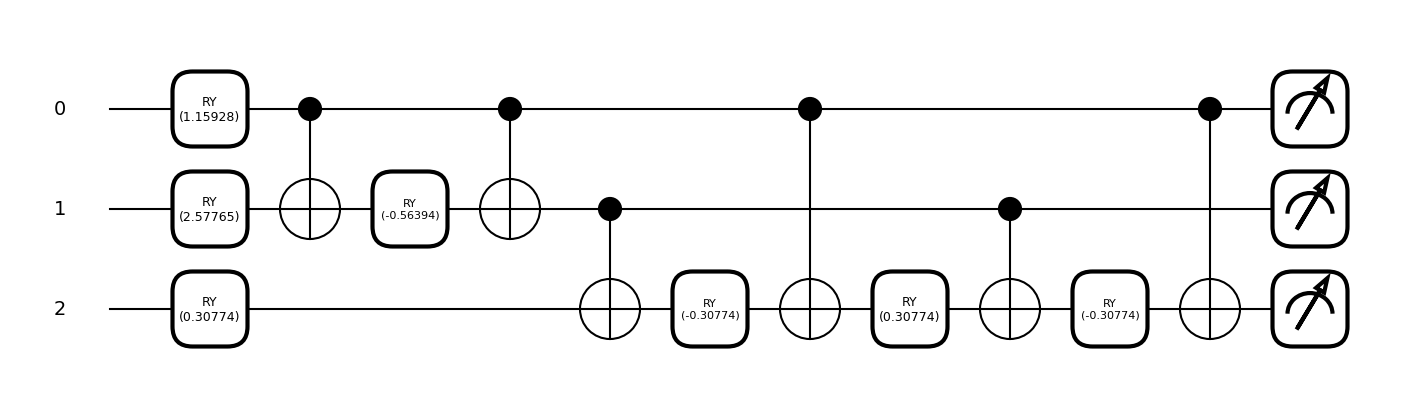

In [10]:
print(qml.draw_mpl(circuit, decimals=5, expansion_strategy="device", max_length=80)(state))

### 2 Qubit implementation

In [11]:
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def circuit(state):
    qml.MottonenStatePreparation(state_vector=state, wires=range(2))
    return qml.state()

state = np.array([0.2, 0.5, 0.2, 0.1])
state = [math.sqrt(i) for i in state]
print (state)

[0.4472135954999579, 0.7071067811865476, 0.4472135954999579, 0.31622776601683794]


(<Figure size 700x300 with 1 Axes>, <Axes: >)


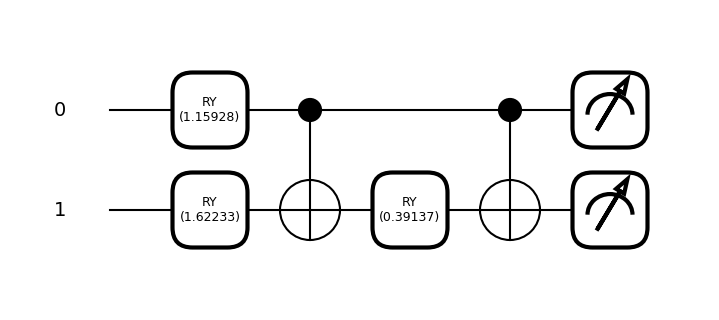

In [12]:
print(qml.draw_mpl(circuit, decimals=5, expansion_strategy="device", max_length=80)(state))

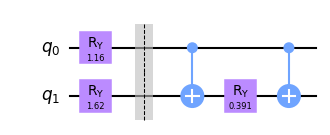

In [13]:
QC = QuantumCircuit(2)
QC.ry(1.15928, 0)
QC.ry(1.62233, 1)
QC.barrier()
QC.cx(0,1)

QC.ry(0.39137, 1)
QC.cnot(0,1)

QC.draw(output="mpl", scale=0.75)

In [14]:
S = Statevector(QC)
S.draw(output="Latex")

<IPython.core.display.Latex object>

## 7. For a given matrix A, Do hamiltonian encoding.

Provided matrix A is not hermitian, hence we need to convert matrix as below, 

$ data = \begin{bmatrix}0 & 0 & 0.073 & -0.438 \\
0 & 0 & 0.73 & 0 \\
0.073 & 0.73 & 0 & 0 \\
-0.438 & 0 & 0 & 0 \end{bmatrix} $

Hamiltonian encoding of above is to convert the data to the form $ e^{iHt} $

$ e^{iHt} = \sum_i \lambda_i |i \rangle \langle i| $ 

Note : The example below uses the time evolution of 0.05

#### Method 1 : Eigen values and vectors

In [15]:
data = [[0,0,0.073,0.-0.438],
        [0,0,0.730,0],
        [0.073,0.730,0,0],
        [-0.438,0,0,0]]
        
eigval, eigvec = np.linalg.eig(data)

A = np.array(eigvec[0])
AT = np.atleast_2d(A).transpose()
l1 = numpy.kron(A, AT)

A = np.array(eigvec[1])
AT = np.atleast_2d(A).transpose()
l2 = numpy.kron(A, AT)

A = np.array(eigvec[2])
AT = np.atleast_2d(A).transpose()
l3 = numpy.kron(A, AT)

A = np.array(eigvec[3])
AT = np.atleast_2d(A).transpose()
l4 = numpy.kron(A, AT)

Z = np.exp(1j*eigval[0]*0.05)*l1 + np.exp(1j*eigval[1]*0.05)*l2 + np.exp(1j*eigval[2]*0.05)*l3 + np.exp(1j*eigval[3]*0.05)*l4
print(numpy.matrix.round(Z, 3))

[[ 1.   -0.j     0.   +0.j     0.   +0.002j  0.   +0.022j]
 [ 0.   +0.j     0.999+0.j     0.   -0.037j -0.   -0.002j]
 [ 0.   +0.002j  0.   -0.037j  0.999+0.j    -0.   -0.j   ]
 [ 0.   +0.022j -0.   -0.002j -0.   -0.j     1.   -0.j   ]]


#### Method 2: Use internal qiskit support for HamiltonianGate. 


In [16]:
gate = HamiltonianGate(data, 0.05, label="H")
Unitary = gate.to_matrix()
print(numpy.matrix.round(Unitary, 3))
QC = QuantumCircuit(2)
QC.append(gate, [0,1])

QC.draw()
decom = QC.decompose()
decom.draw()

[[ 1.   +0.j    -0.   +0.j     0.   -0.004j  0.   +0.022j]
 [-0.   +0.j     0.999+0.j     0.   -0.036j  0.   -0.j   ]
 [ 0.   -0.004j  0.   -0.036j  0.999+0.j     0.   +0.j   ]
 [ 0.   +0.022j  0.   -0.j     0.   +0.j     1.   +0.j   ]]


┌──────────┐
q_0: ┤0         ├
     │  Unitary │
q_1: ┤1         ├
     └──────────┘

## 8. Construct a swap gate using CNOT gates.

The method below is from Nielsen Fig 1.7 and also in the following research paper.

https://www.researchgate.net/publication/216778423_The_cost_of_quantum_gate_primitives

#### Swap gate with 3 CNOT gates

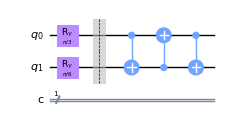

In [17]:
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.ry(pi / 3, qreg_q[0])
circuit.ry(pi / 6, qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.draw(output="mpl", scale=0.5)

In [18]:
state = Statevector(circuit)
state.draw(output="Latex")

<IPython.core.display.Latex object>

#### Swap gate primitive

In [19]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.ry(pi / 3, qreg_q[0])
circuit.ry(pi / 6, qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.swap(qreg_q[0], qreg_q[1])

state = Statevector(circuit)
state.draw(output="Latex")

<IPython.core.display.Latex object>

## 9. Construct the control swap gate matrix using bra-ket notation.

A general swap gate, is like the one below. 

|I|O|
|-|-|
|00|00|
|01|10|
|10|01|
|11|11|

SWAP = $ |00 \rangle \langle 00| + |01 \rangle \langle 10| + |10 \rangle \langle 01| + |11 \rangle \langle 11| $

CSWAP = $ (|0\rangle \langle 0| \otimes I \otimes I ) + (|1\rangle \langle 1| \otimes SWAP ) $

#### CSWAP matix representation is as below. 

In [20]:
ZB = np.array([[1],[0]])
ZK = np.atleast_2d(ZB).transpose()

OB = np.array([[0],[1]])
OK = np.atleast_2d(OB).transpose()

S00 = np.kron(ZB, ZB)
S01 = np.kron(ZB, OB)
S10 = np.kron(OB, ZB)
S11 = np.kron(OB, OB)

S00x00 = np.kron(S00, S00.T)
S01x10 = np.kron(S01, S10.T)
S10x01 = np.kron(S10, S01.T)
S11x11 = np.kron(S11, S11.T)

SWAP = S00x00 + S01x10 + S10x01 + S11x11
Z = np.kron(np.kron(np.kron(ZB,ZK), np.eye(2)), np.eye(2))
O = np.kron(np.kron(OB, OK), SWAP)

Z + O

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

## 10. SWAP test

#### +, 0

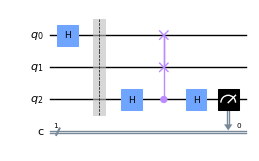

In [21]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])

circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.h(qreg_q[2])
circuit.cswap(qreg_q[2], qreg_q[0], qreg_q[1])
circuit.h(qreg_q[2])
circuit.measure(qreg_q[2], creg_c[0])
circuit.draw(output="mpl", scale=0.5)

In [22]:

nShots = 5000
backend = Aer.get_backend('aer_simulator_statevector') 
result = backend.run(transpile(circuit, backend), shots=nShots).result()
counts = result.get_counts()
if '0' in counts:
    b = counts['0']
else:
    b = 0
    
s = round(abs(1 - (2*(b/nShots))),1)

print("Squared Inner Product:",str(s), 'Inner product :', math.sqrt(s))

Squared Inner Product: 0.5 Inner product : 0.7071067811865476


#### +, +

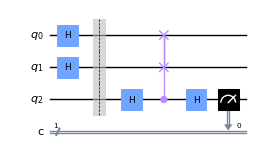

In [23]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])

circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.h(qreg_q[2])
circuit.cswap(qreg_q[2], qreg_q[0], qreg_q[1])
circuit.h(qreg_q[2])
circuit.measure(qreg_q[2], creg_c[0])
circuit.draw(output="mpl", scale=0.5)

In [24]:

nShots = 5000
backend = Aer.get_backend('aer_simulator_statevector') 
result = backend.run(transpile(circuit, backend), shots=nShots).result()
counts = result.get_counts()
if '0' in counts:
    b = counts['0']
else:
    b = 0
    
s = round(abs(1 - (2*(b/nShots))),3)

print("Squared Inner Product:",str(s), 'Inner product :', math.sqrt(s))

Squared Inner Product: 1.0 Inner product : 1.0


### +, -

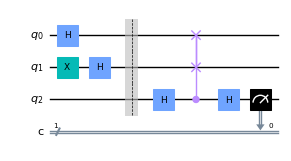

In [25]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.x(qreg_q[1])
circuit.h(qreg_q[1])

circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.h(qreg_q[2])
circuit.cswap(qreg_q[2], qreg_q[0], qreg_q[1])
circuit.h(qreg_q[2])
circuit.measure(qreg_q[2], creg_c[0])
circuit.draw(output="mpl", scale=0.5)

In [26]:
nShots = 5000
backend = Aer.get_backend('aer_simulator_statevector') 
result = backend.run(transpile(circuit, backend), shots=nShots).result()
counts = result.get_counts()
if '0' in counts:
    b = counts['0']
else:
    b = 0
    
s = round(abs(1 - (2*(b/nShots))),1)

print("Squared Inner Product:",str(s), 'Inner product :', math.sqrt(s))

Squared Inner Product: 0.0 Inner product : 0.0


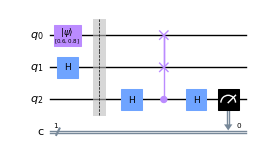

In [27]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.initialize([3/5, 4/5], 0)
circuit.h(qreg_q[1])

circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.h(qreg_q[2])
circuit.cswap(qreg_q[2], qreg_q[0], qreg_q[1])
circuit.h(qreg_q[2])
circuit.measure(qreg_q[2], creg_c[0])
circuit.draw(output="mpl", scale=0.5)

In [28]:
nShots = 5000
backend = Aer.get_backend('aer_simulator_statevector') 
result = backend.run(transpile(circuit, backend), shots=nShots).result()
counts = result.get_counts()
if '0' in counts:
    b = counts['0']
else:
    b = 0
    
s = round(abs(1 - (2*(b/nShots))),10)

print("Squared Inner Product:",str(s), 'Inner product :', math.sqrt(s))

Squared Inner Product: 0.9796 Inner product : 0.9897474425326898
